In [1]:
import torch_geometric
from torch_geometric.datasets import MoleculeNet

import networkx as nx
import pandas as pd
from IPython.display import display

from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
# Load the HIV dataset
dataset = MoleculeNet(root="/Users/benbradshaw/Documents/Code/2023/hiv/data/", name="HIV")

/Users/benbradshaw/Documents/Code/2023/hiv/myenv_hiv/lib/python3.10/site-packages/torch_geometric/data/dataset.py:238: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  if osp.e

In [3]:
num_node_features = dataset.num_node_features
num_edge_features = dataset.num_edge_features
num_graphs = len(dataset)
print('Number of Node Festures', num_node_features)
print('Number of Edges features', num_edge_features)
print('Number of Graphs:', num_graphs)

Number of Node Festures 9
Number of Edges features 3
Number of Graphs: 41127


In [4]:
num_nodes = [data.num_nodes for data in dataset]
num_edges = [data.num_edges for data in dataset]

avg_nodes = sum(num_nodes) / len(num_nodes)
avg_edges = sum(num_edges) / len(num_edges)

print(f"Average nodes per graph: {avg_nodes}")
print(f"Average edges per graph: {avg_edges}")

Average nodes per graph: 25.510321686483334
Average edges per graph: 54.93656235563012


In [5]:
data = dataset[0]

# Examine the attributes of the graph
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Node features shape: {data.x.shape}")
print(f"Edge index shape: {data.edge_index.shape}")
print(f"Edge attributes shape: {data.edge_attr.shape if data.edge_attr is not None else 'No edge attributes'}")

Number of nodes: 19
Number of edges: 40
Node features shape: torch.Size([19, 9])
Edge index shape: torch.Size([2, 40])
Edge attributes shape: torch.Size([40, 3])


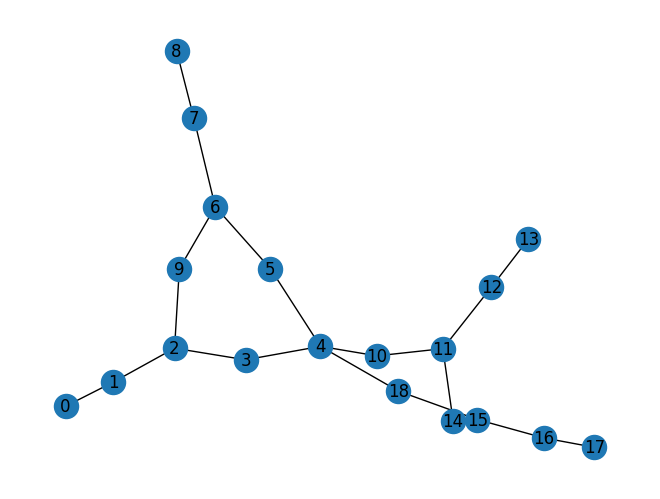

In [6]:
G = torch_geometric.utils.to_networkx(data, to_undirected=True)
nx.draw(G, with_labels=True)

In [7]:
number_molecules_with_hiv = 0
pos_indexes, neg_indexes = [], []
for index, molecule in enumerate(dataset):
	label = molecule.y.item()
	if label:
		number_molecules_with_hiv += 1
		pos_indexes.append(index)
	else:
		neg_indexes.append(index)

pct_molecules_with_hiv = (100*number_molecules_with_hiv)/num_graphs
number_molecules_without_hiv = num_graphs - number_molecules_with_hiv

print('Number of Molecules with HIV CM or CA: {:.2f}%'.format(pct_molecules_with_hiv))

Number of Molecules with HIV CM or CA: 3.51%


[18:25:50] WARNING: not removing hydrogen atom without neighbors
[18:25:50] WARNING: not removing hydrogen atom without neighbors


HIV Positive Molecules:


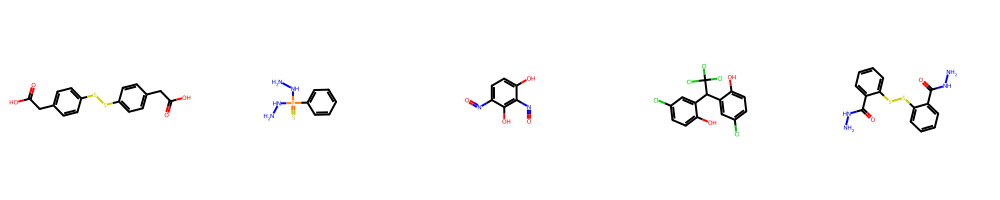

HIV Negative Molecules:


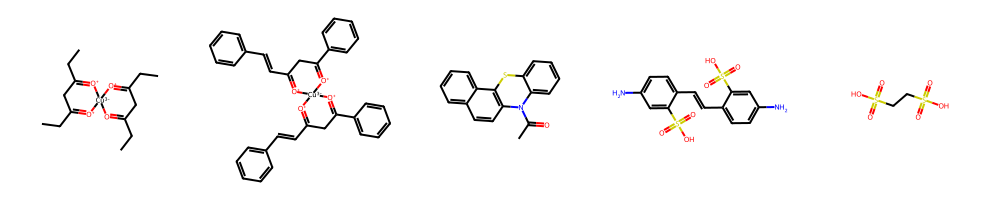

In [8]:
df = pd.read_csv('/Users/benbradshaw/Documents/Code/2023/hiv/data/hiv/raw/HIV.csv')
smiles = df['smiles'].tolist()

num_examples = 5
pos_molecules = [Chem.MolFromSmiles(smiles[index]) for index in pos_indexes]
neg_molecules = [Chem.MolFromSmiles(smiles[index]) for index in neg_indexes]

pos_molecules_sample = pos_molecules[:num_examples]
neg_molecules_sample = neg_molecules[:num_examples]

pos_images = Draw.MolsToGridImage(pos_molecules_sample, molsPerRow=num_examples)
neg_images = Draw.MolsToGridImage(neg_molecules_sample, molsPerRow=num_examples)

print('HIV Positive Molecules:')
display(pos_images)
print('HIV Negative Molecules:')
display(neg_images)


with open("./examples/pos_images.png", "wb") as f:
    f.write(pos_images.data)

with open("./examples/neg_images.png", "wb") as f:
    f.write(neg_images.data)

In [145]:
df = pd.read_csv('./data/hiv/raw/HIV.csv')
print('Number of Molecules HIV Positive:', number_molecules_with_hiv)
print('Number of Molecules HIV Negative:', number_molecules_without_hiv)

Number of Molecules HIV Positive: 1443
Number of Molecules HIV Negative: 39684
